In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. Linear regression with one variable

<font size=3>
&emsp;&emsp;In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.    
&emsp;&emsp;You would like to use this data to help you select which city to expand to next.    
&emsp;&emsp;The file **ex1data1.txt** contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food trunk in that city. A negative value for profit indicates a loss.  
</font>

In [2]:
#加载数据
data = pd.read_csv('./ex1data1.txt', names=['population', 'profit'])
data.head(5)

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
#查看数据基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population    97 non-null float64
profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


## 1.1 Plotting the Data

<font size=3>
&emsp;&emsp;Before starting on any task, it is often useful to understand the data by visualizing it. Fot this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). (Many other problems that you will enconter in real life are multi-dimensional and can't be plotted on a 2-d plot.)
</font>

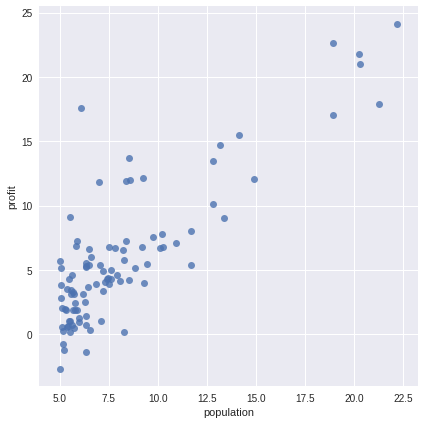

In [4]:
plt.figure(figsize=(12, 8))
sns.lmplot('population', 'profit', data, size=6, fit_reg=False)
plt.show()

## 1.2 Gradient Descent

<font size=3>
&emsp;&emsp;In this part, you will fit the linear regression parameters **$\theta$** to our dataset using gradient descent.
</font>

### 1.2.1 Update Equations

<font size=3>
&emsp;&emsp;The objective of linear regresion is to minimize the cost function **$$ J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}({h}_{\theta }(x^{(i)})-y^{(i)})^{2}$$**
</font>

<font size=3>
&emsp;&emsp;Where the hypothesis *${h}_{\theta }{(x)}$* is given by the linear model **$${h}_{\theta }{(x)}={\theta }^{T}{x}={\theta}_{0}+{\theta}_{1}{x}_{1}$$**
</font>

<font size=3>
&emsp;&emsp;Recall that the parameters of your model are the ${\theta }_{j}$ values. These are the values you will adjust to minimize cost $J({\theta})$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update $${\theta}_{j}:={\theta}_{j}-{\alpha}\frac{1}{m}\sum_{i=1}^{m}({h}_{\theta}({x}^{(i)})-{y}^{(i)}){x}^{(i)}_{j}{\quad}(simultaneously\ update\  {\theta}_{j}\ for\ all\ j)$$.  
&emsp;&emsp;With each step of gradient descent, your parameter {\theta}_{j} come closer to the optimal values that achieve the lowest cost ${J(\theta)}$.
</font>

### 1.2.2 Implementation

<font size=3>
&emsp;&emsp;Now, we add another dimension to our data to accommodate the ${\theta}_{0}$ intercept term. We also initialize the initial parameters to 0 and the learning rate **alpha** to 0.01.
</font>

In [5]:
def loadData(df):
    # ones 为m行1列的dataframe
    ones = pd.DataFrame({'ones': np.ones(len(df))})
    data = pd.concat([ones, df], axis=1)
    X = np.matrix(data.iloc[:, :-1])
    y = np.matrix(data.iloc[:, -1]).reshape(-1,1)
    return X, y

In [6]:
def initializeWithZeros(dim):
    return np.zeros((dim, 1))

In [7]:
X, y = loadData(data)
theta = initializeWithZeros(X.shape[1])
alpha = 0.01

### 1.2.3 Computing the cost $J({\theta})$

<font size=3>
&emsp;&emsp;As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation.  
&emsp;&emsp;You shoule expect to see a cost of 32.07.
</font>

In [8]:
def computeCost(X, y, theta):
    m = X.shape[0]
    return np.sum(np.power(X @ theta - y, 2)) / (2*m)

In [9]:
cost = computeCost(X, y, theta)
cost

32.072733877455676

### 1.2.4 Gradient descent

<font size=3>
&emsp;&emsp;Next, you will implement gradient descent. As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J{(\theta)}$ is parameterized by the vector ${\theta}$, not X and y. That is, we minimize the value of $J{(\theta)}$ by changing the values of the vactor ${\theta}$, not by changing X or y.  
&emsp;&emsp;A good way to verify that gradient descent is working correctly is to look at the value of $J{(\theta)}$ and check that it is decreasing with each step. The function *gradientDescent()* calls *computeCost()* on evert iteration and prints the cost. Assuming you have implemented gradient descent and *computeCost()* correctly, your value of $J{(\theta)}$ should never increase, and should converge to a stead value by the end of the algorithm.  
</font> 

In [10]:
def batchGradientDescent_2(X, y, theta, alpha, iters, printFlag=True):
    # 这个临时变量是必须的
    temp = np.matrix(np.zeros(theta.shape))
    # 计算参数的个数
    parameters_num = theta.shape[0]
    # 记录每轮迭代损失函数的大小
    cost = np.zeros(iters)
    # 计算训练数据的样本数
    m = X.shape[0]
    
    for i in range(iters):
        error = X @ theta - y
        
        for j in range(parameters_num):
            term = np.multiply(error, X[:, j])
            temp[j, 0] = theta[j, 0] - (alpha  / m) * np.sum(term)
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
        # 每50轮打印一次损失函数的值
        if printFlag and i % 50 == 0:
            print('第{iters}轮:{cost}'.format(iters=i, cost=cost[i]))
            
    return theta, cost

<font size=3>
&emsp;&emsp;上面所写的梯度下降法还可以进行优化，可以去掉第二层for循环，改用向量计算的方法。这样能够提高程序运行的速度。
</font>

In [11]:
def batchGradientDescent(X, y, theta, alpha, iters, printFlag=True):
    
    m = X.shape[0]
    cost = np.zeros(iters)
    
    for i in range(iters):
        grad = np.dot(X.T, X @ theta - y) / m
        theta = theta - alpha * grad
        cost[i] = computeCost(X, y, theta)
    
        if printFlag and i % 50 == 0:
            print('第{iters}轮:{cost}'.format(iters=i, cost=cost[i]))
    
    return theta, cost

<font size=3>
对参数进行初始化：参数theta、学习速率α、迭代次数iters
</font>

In [12]:
alpha = 0.01
iters = 500
theta = initializeWithZeros(X.shape[1])
theta, cost = batchGradientDescent(X, y, theta, alpha, iters)

第0轮:6.737190464870009
第50轮:5.673965480401505
第100轮:5.476362817272741
第150轮:5.311380876611356
第200轮:5.173634551165022
第250轮:5.05862772012701
第300轮:4.962606493117519
第350轮:4.88243668100122
第400轮:4.815501494116686
第450轮:4.7596161287279255


<font size=3>
绘制拟合曲线，对训练结果进行可视化
</font>

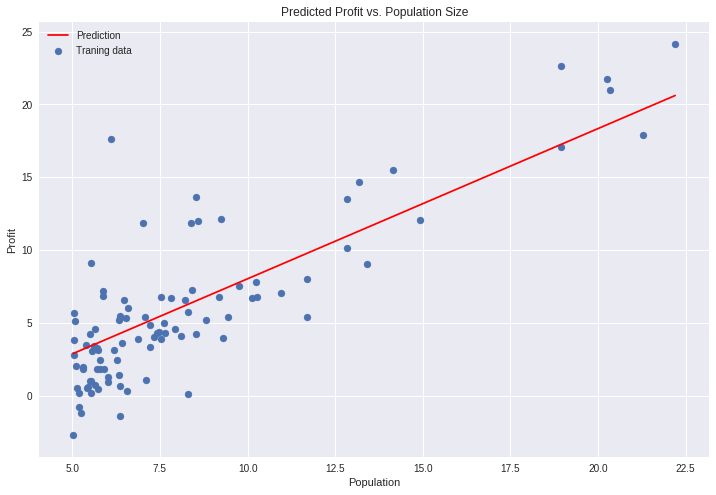

In [13]:
x = np.linspace(data['population'].min(), data['population'].max(), 100)
y = theta[0, 0] + theta[1, 0] * x

plt.figure(figsize=(12, 8))
plt.plot(x, y, color='red', label='Prediction')
plt.scatter(data['population'], data['profit'], label='Traning data')
plt.legend()
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Predicted Profit vs. Population Size')
plt.show()

## 1.3 Visualizing $J{(\theta)}$

<font size=3>
&emsp;&emsp;通过绘制损失函数的变化趋势，可以使我们更好地理解损失函数。
</font>

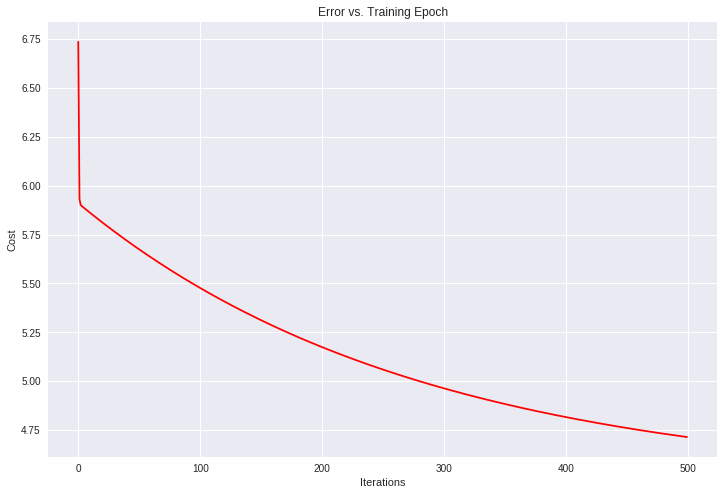

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(iters), cost, color='red')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Error vs. Training Epoch')
plt.show()

# 2. Linear regression with multiple variables

<font size=3>
&emsp;&emsp;In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses  sold and make a model of housing prices.  
&emsp;&emsp;The file **ex1data2.txt** contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.
</font>

In [15]:
data = pd.read_csv('./ex1data2.txt', names=['size', 'bedrooms', 'price'])
data.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## 2.1 Feature scaling

<font size=3>
&emsp;&emsp;Note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.
</font>

<font size=3>
&emsp;&emsp;特征归一化有两种方法：一个是标准化（减均值除标准差），另一个是最大-最小值归一化。
</font>

In [16]:
def normalizeFeatures(df):
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [17]:
data = normalizeFeatures(data)
data.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


## 2.2 Gradient Descent

<font size=3>
&emsp;&emsp;之前实现的批量梯度下降为了方便，已经可以用于多变量线性回归，因此，这部分不需要重新实现批量梯度下降函数。所以，我们快速实现这一训练过程。
</font>

In [18]:
# 加载数据
X, y = loadData(data)
# 初始化theta
theta = initializeWithZeros(X.shape[1])
# 设置学习速率和迭代次数
alpha, iters = 0.01, 1000
# 批量梯度下降
theta, cost = batchGradientDescent(X, y, theta, alpha, iters)

第0轮:0.4805491041076719
第50轮:0.2466270514254147
第100轮:0.18209443801333897
第150轮:0.1589449657733043
第200轮:0.1479382495738683
第250轮:0.14165454023209023
第300轮:0.1377591345050687
第350轮:0.13526905125531044
第400轮:0.1336603777249612
第450轮:0.13261743173777144
第500轮:0.1319404652949001
第550轮:0.13150088138523836
第600轮:0.13121540352412622
第650轮:0.13102999845828087
第700轮:0.13090958448719198
第750轮:0.13083137954753649
第800轮:0.13078058791637864
第850轮:0.130747600343977
第900轮:0.13072617594607358
第950轮:0.1307122614680553


In [19]:
theta

matrix([[ -1.03049956e-16],
        [  8.78503652e-01],
        [ -4.69166570e-02]])

<font size=3>
查看损失函数的变化趋势
</font>

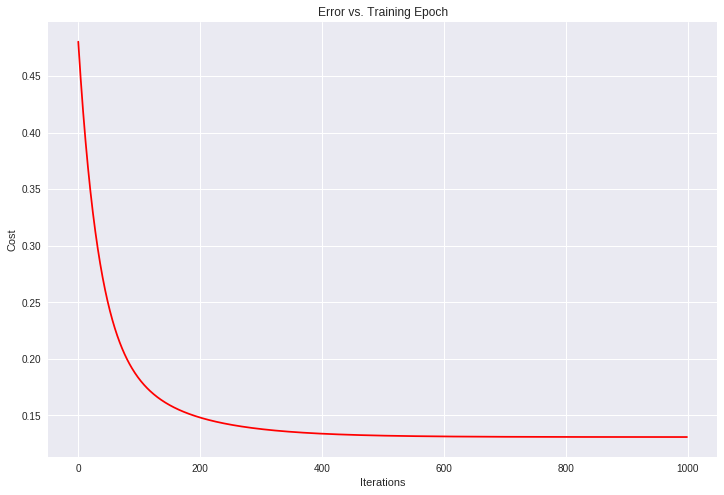

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(iters), cost, color='red')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Error vs. Training Epoch')
plt.show()

## 2.3 Selecting learning rates

<font size=3>
&emsp;&emsp;In this part of the exercise, you will get to try out different learning rates for the dataset and find a learning rate that converges quickly.  
&emsp;&emsp;We recommend trying values of the learnig rate ${\alpha}$ on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on). You may also want to adjust the number of iterations you are running if that will help you see the overall trend in the curve.
</font>

In [21]:
base = np.logspace(-1, -5, num=4)
candidate = np.sort(np.concatenate((base, base*3)))
candidate

array([  1.00000000e-05,   3.00000000e-05,   2.15443469e-04,
         6.46330407e-04,   4.64158883e-03,   1.39247665e-02,
         1.00000000e-01,   3.00000000e-01])

第0轮:0.48935282630680776
-----------------------------------------------
第0轮:0.48889163189384
-----------------------------------------------
第0轮:0.4874014382501823
-----------------------------------------------
第0轮:0.47767477918367307
-----------------------------------------------
第0轮:0.4481778393626944
-----------------------------------------------
第0轮:0.3125713742011687
-----------------------------------------------
第0轮:0.17757033380170464
-----------------------------------------------
第0轮:0.13106616826695952
-----------------------------------------------


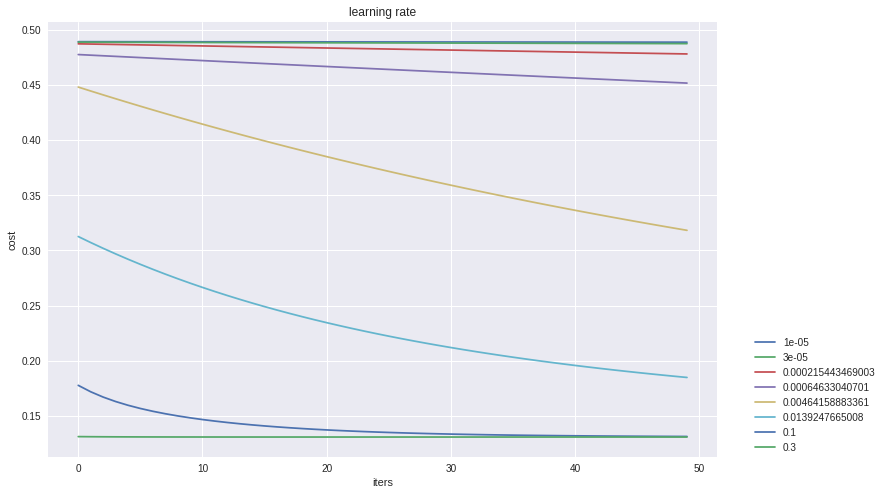

In [22]:
iters = 50
theta = initializeWithZeros(X.shape[1])

plt.figure(figsize=(12, 8))

for alpha in candidate:
    theta, cost = batchGradientDescent(X, y, theta, alpha, iters)
    print('-----------------------------------------------')
    plt.plot(np.arange(iters), cost, label=alpha)

plt.xlabel('iters')
plt.ylabel('cost')
plt.title('learning rate')
plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
plt.show()

<font size=3>
&emsp;&emsp;Notice the changes in the convergence curves as the learning rate changes. With a small learning rate, you should find that gradient descent takes a very long time to converge to the optimal value. Conversely, with a large learning rate, gradient descent might not converge or might even diverge!
</font>

# 3. Normal Equation (正规方程)

<font size=3>
&emsp;&emsp;正规方程是通过求解下面的方程来找出使损失函数最小的参数的 **$$\frac{\partial}{\partial{\theta}_{j}}J({\theta}_{j}) = 0$$**
&emsp;&emsp;假设我们的训练集特征矩阵为X（包含${x}_{0}=1$）并且，我们的训练集结果为向量y，则利用正规方程解出向量$${\theta}=(X^{T}X)^{-1}X^{T}\vec{y}$$
&emsp;&emsp;利用上面这个公式的话，就不需要进行特征归一化，同时，通过一次计算就可以得到精确的结果。不需要经历像梯度下降法这样通过“不断循环直到收敛”的过程。
</font>

<font size=3>
**梯度下降与正规方程比较：**  
&emsp;&emsp;1. 梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好地适用，适用于各种类型的模型。  
&emsp;&emsp;2. 正规方程： 不需要选择α，一次计算得出，需要计算$(X^TX)^{-1}$，如果特征数量n较大，则运算速度较慢。因为，矩阵逆的计算时间复杂度为$O（n^3）$，通常来说，当n小于10000时，还是可以接受的。只适用于线性模型，不适用逻辑回归等其他模型。
</font>

In [23]:
def normalEquation(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta

In [24]:
theta = normalEquation(X, y)
theta

matrix([[ -1.04083409e-16],
        [  8.84765988e-01],
        [ -5.31788197e-02]])